In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from dataset import Dataset
dataset = Dataset()

In [14]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [18]:
print(len(dataset.patches))
print(np.std(dataset.patches))
print(np.mean(dataset.patches))

2375
2.1438892
-0.0016897094


In [19]:
#k1 = 0.5
#k2 = 1.0

k1 = 0.5
k2 = 0.02

U_scale = 1.0
I_scale = 1.0

#sigma_sq    = 1.0
sigma_sq    = 30.0
sigma_sq_td = 10.0
alpha1      = 1.0
alpha2      = 0.05
lambd       = 0.02

#iteration = 40
iteration = 10
epochs = 3

Us = (np.random.rand(3,256,32)-0.5) * U_scale
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches) # 2375

image_count = 0

for epoch in range(epochs):
    for k in range(patch_size):
        patch = dataset.patches[k]    
        rs = np.zeros([3, 32], dtype=np.float32)
    
        for i in range(iteration):
            for j in range(3):
                I = get_image(patch, j) * I_scale            
                r = rs[j]
                U = Us[j]
                Ur = U.dot(r)
                error = I - Ur
                dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
                dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
                rs[j] += dr
                Us[j] += dU
        if k % 100 == 0:
            print("us mean={} std={}".format(np.mean(Us[0]), np.std(Us[0])))                                    
            print("rs mean={} std={}".format(np.mean(rs), np.std(rs)))
            
        image_count += 1
    
        if image_count % 40 == 0:
            k2 = k2 / 1.015
        #    print("k2={}".format(k2))        
        

us mean=0.004434204699643393 std=0.28523297689989446
rs mean=4.2773717924631424e-17 std=2.83079152126216e-16
us mean=0.0030132270306914306 std=0.19219569580452997
rs mean=0.0001633798674447462 std=0.007980851456522942
us mean=0.0020912477571801364 std=0.1315107130612148
rs mean=0.0006106045912019908 std=0.03181410953402519
us mean=0.0015114459333004228 std=0.09140185486208337
rs mean=-0.0027788039296865463 std=0.035216324031353
us mean=0.0011204795284816967 std=0.06437905116755809
rs mean=1.8696487107211492e-17 std=1.1272309168104309e-16
us mean=0.0008240588181907763 std=0.045959074067288545
rs mean=-0.0012431968934834003 std=0.00837666541337967
us mean=0.0007935344515595808 std=0.041823237806079584
rs mean=0.04191858693957329 std=0.47663867473602295
us mean=0.0006147348981430113 std=0.1154270204683649
rs mean=-0.014474417082965374 std=0.20147481560707092
us mean=0.002713694287806857 std=0.15404243321293054
rs mean=-0.033617693930864334 std=0.26441678404808044
us mean=0.003369117864260

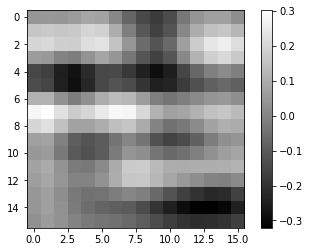

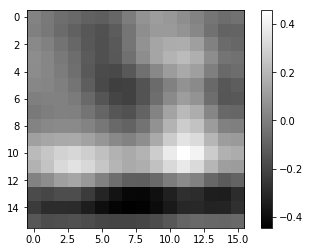

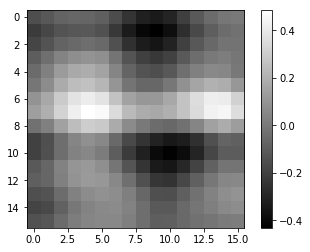

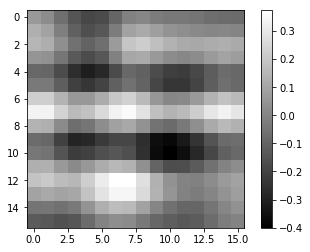

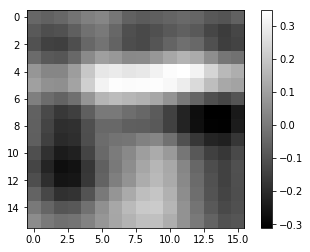

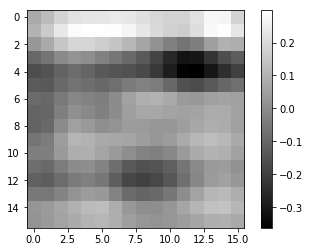

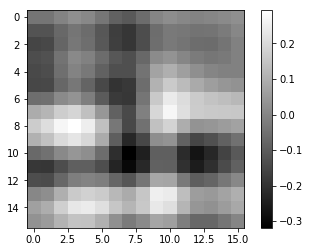

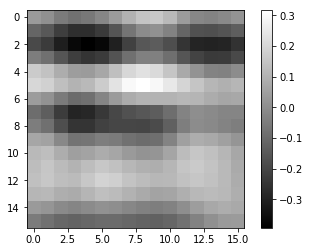

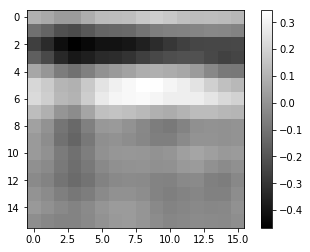

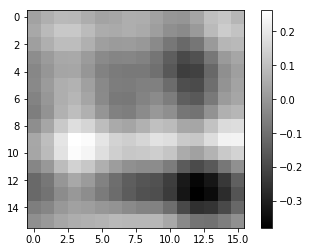

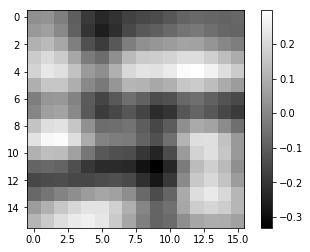

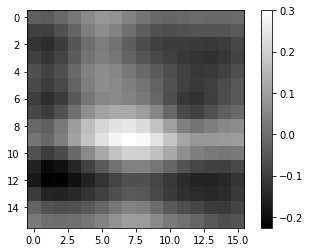

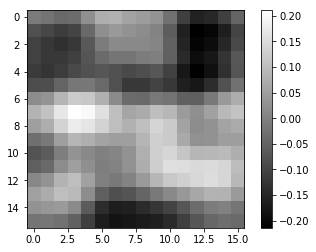

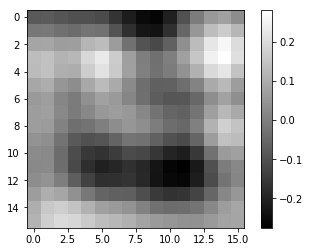

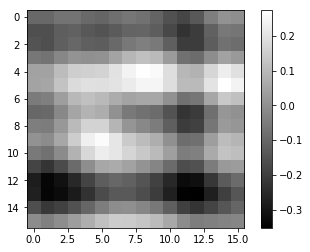

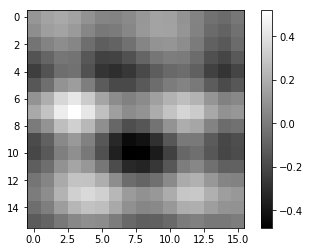

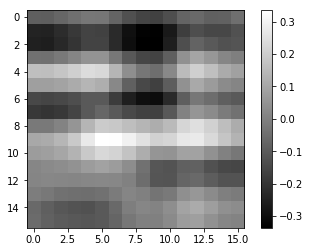

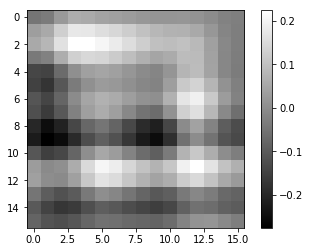

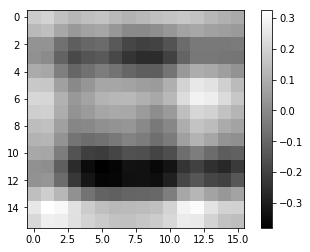

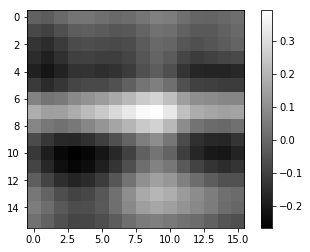

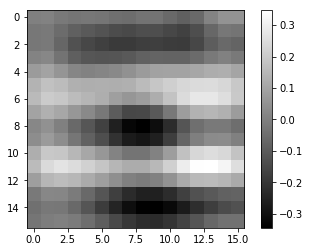

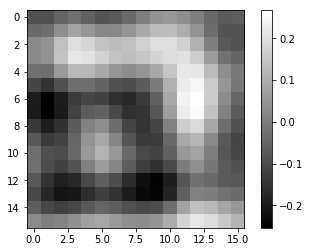

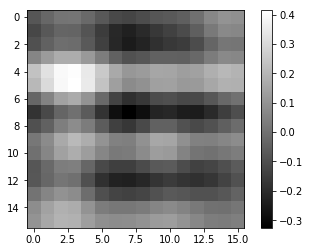

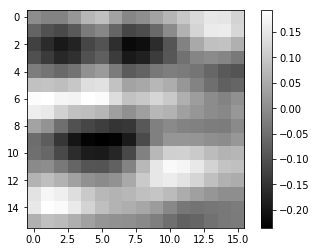

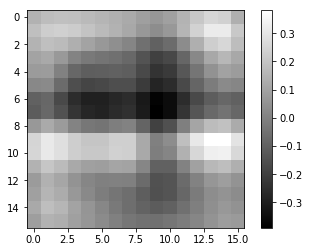

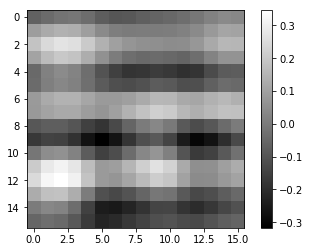

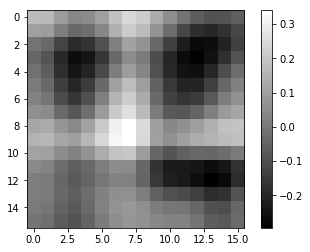

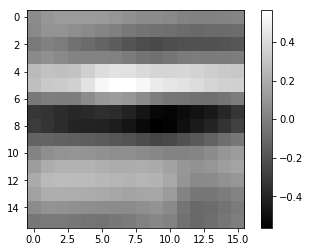

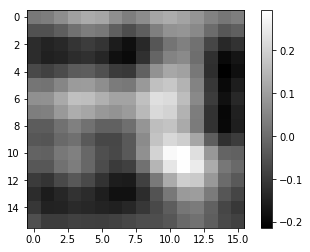

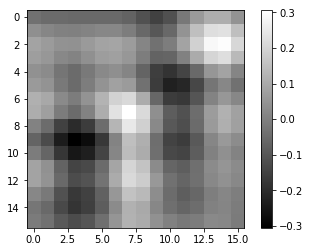

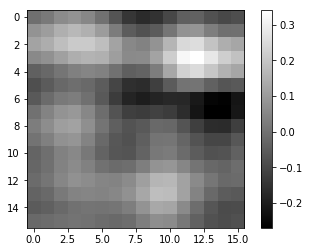

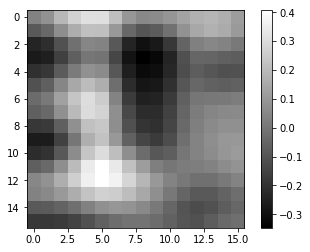

In [20]:
for i in range(32):
    u = Us[1][:,i].reshape(16,16)
    plt.figure()
    plt.imshow(u, cmap='gray')
    plt.colorbar()
    plt.show()

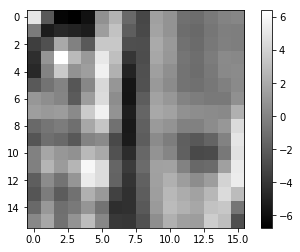

In [7]:
patch = dataset.patches[500]
for j in range(3):
    I = get_image(patch, j) * I_scale 
    
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
patch = dataset.patches[0]    
for i in range(iteration):
    j = 0
    I = get_image(patch, j) * I_scale            
    r = rs[j]
    U = Us[j]
    Ur = U.dot(r)
    error = I - Ur
    dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
    rs[j] += dr
    
    #if k % 40 == 0:
    #    k2 = k2 / 1.015
    #    print("k2={}".format(k2))        
        

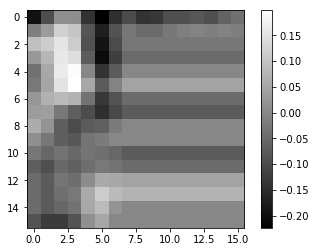

In [18]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()